<h1>Imports</h1>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import gamma, norm, probplot, pearsonr, chi2_contingency

<h1>Seção 1: Dataset</h1>

In [2]:
chrome = pd.read_csv('dataset_chromecast.csv')
smart = pd.read_csv('dataset_smart-tv.csv')
print(f'chrome:\n{chrome} \n\n smart: \n{smart}')

chrome:
         device_id            date_hour     bytes_up    bytes_down
0         66161985  2021-09-06 00:01:00  2987.016393  49185.704918
1         66161985  2021-09-06 00:02:00   685.935484    328.258065
2         66161985  2021-09-06 00:03:00  4493.901639  37914.064516
3         66161985  2021-09-06 00:04:00   776.133333    229.200000
4         66161985  2021-09-06 00:05:00  3081.311475  51656.800000
...            ...                  ...          ...           ...
1620524   90339988  2021-11-26 16:52:00  2024.000000  43432.000000
1620525   90339988  2021-11-26 16:53:00  7088.000000   1592.000000
1620526   90339988  2021-11-26 16:54:00   488.000000  49632.000000
1620527   90339988  2021-11-26 16:55:00     0.000000    136.000000
1620528   90339988  2021-11-26 16:57:00     0.000000     96.000000

[1620529 rows x 4 columns] 

 smart: 
         device_id            date_hour       bytes_up    bytes_down
0         77209603  2021-11-22 15:23:00  132932.983607  2.818140e+06
1         7

In [3]:
chrome.bytes_up = 1 + chrome.bytes_up
chrome.bytes_down = 1 + chrome.bytes_down
smart.bytes_up = 1 + smart.bytes_up
smart.bytes_down = 1 + smart.bytes_down


chrome.bytes_up = np.log10(chrome.bytes_up).to_numpy()
chrome.bytes_down = np.log10(chrome.bytes_down).to_numpy()
smart.bytes_up = np.log10(smart.bytes_up).to_numpy()
smart.bytes_down = np.log10(smart.bytes_down).to_numpy()

print(f'chrome:\n{chrome} \n\n smart: \n{smart}')

chrome:
         device_id            date_hour  bytes_up  bytes_down
0         66161985  2021-09-06 00:01:00  3.475383    4.691848
1         66161985  2021-09-06 00:02:00  2.836916    2.517536
2         66161985  2021-09-06 00:03:00  3.652720    4.578812
3         66161985  2021-09-06 00:04:00  2.890496    2.362105
4         66161985  2021-09-06 00:05:00  3.488877    4.713136
...            ...                  ...       ...         ...
1620524   90339988  2021-11-26 16:52:00  3.306425    4.637820
1620525   90339988  2021-11-26 16:53:00  3.850585    3.202216
1620526   90339988  2021-11-26 16:54:00  2.689309    4.695771
1620527   90339988  2021-11-26 16:55:00  0.000000    2.136721
1620528   90339988  2021-11-26 16:57:00  0.000000    1.986772

[1620529 rows x 4 columns] 

 smart: 
         device_id            date_hour  bytes_up  bytes_down
0         77209603  2021-11-22 15:23:00  5.123636    6.449963
1         77209603  2021-11-22 15:24:00  5.063602    6.354955
2         77209603  202

<h1>Seção 2: Estatísticas gerais</h1>

In [4]:
cupload = chrome[['bytes_up']]
cdownload = chrome[['bytes_down']]
supload = smart[['bytes_up']]
sdownload = smart[['bytes_down']]
print(f'''upload chrome: \n média: {np.mean(a=cupload).item()} \n variância: {np.var(a=cupload).item()}  \n desvio padrão: {np.std(a=cupload).item()}
\n download chrome: \n média: {np.mean(a=cdownload).item()} \n variância: {np.var(a=cdownload).item()} \n desvio padrão: {np.std(a=cdownload).item()}
\n upload smart: \n média: {np.mean(a=supload).item()} \n variância: {np.var(a=supload).item()} \n desvio padrão: {np.std(a=supload).item()}
\n download smart: \n média: {np.mean(a=sdownload).item()} \n variância: {np.var(a=sdownload).item()} \n desvio padrão: {np.std(a=sdownload).item()}
''')

upload chrome: 
 média: 3.3502996618095193 
 variância: 0.4599683624609476  
 desvio padrão: 0.6782096744082523

 download chrome: 
 média: 3.8000457060383566 
 variância: 1.663894572605127 
 desvio padrão: 1.289920374521283

 upload smart: 
 média: 2.1582882065066804 
 variância: 4.110138414288679 
 desvio padrão: 2.02734763035072

 download smart: 
 média: 2.351678620482843 
 variância: 6.721322375969502 
 desvio padrão: 2.592551325619129



C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


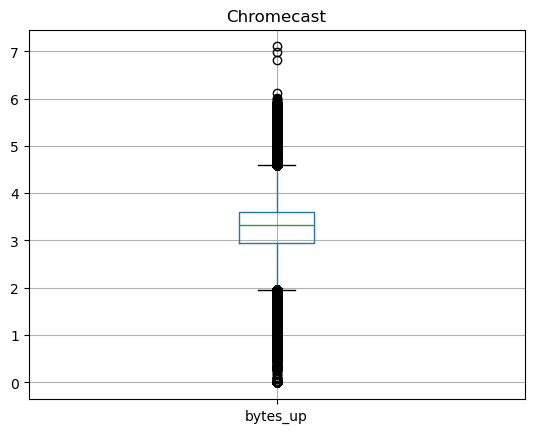

In [5]:
cupload.boxplot().plot()
plt.title('Chromecast')
plt.show()

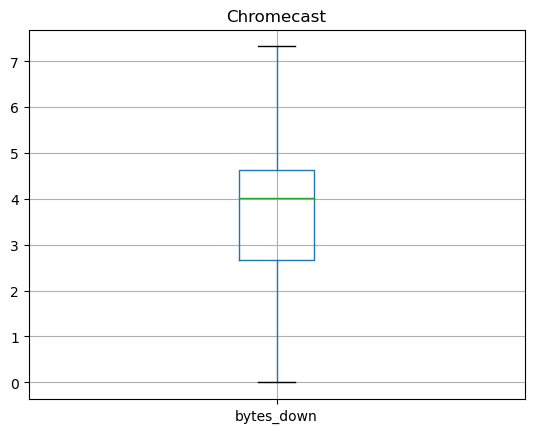

In [6]:
cdownload.boxplot().plot()
plt.title('Chromecast')
plt.show()

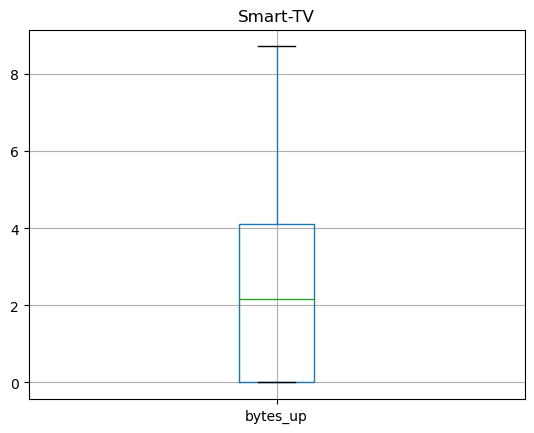

In [7]:
supload.boxplot().plot()
plt.title('Smart-TV')
plt.show()

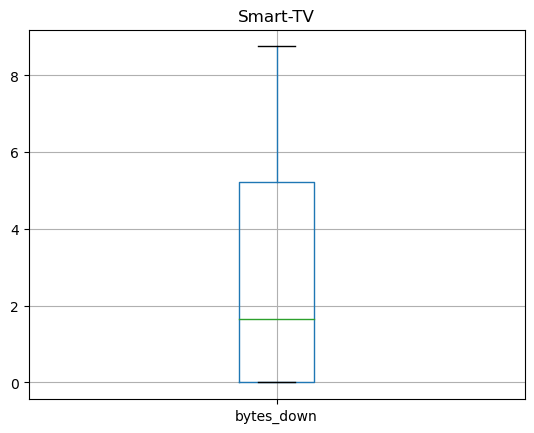

In [8]:
sdownload.boxplot().plot()
plt.title('Smart-TV')
plt.show()

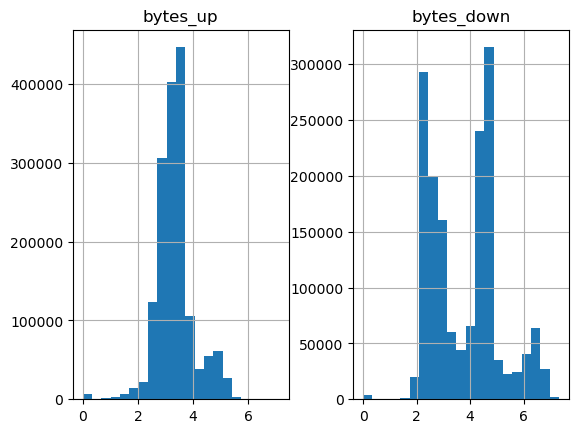

In [9]:
chrome.hist(column = ['bytes_up','bytes_down'], bins = int(1 + 3.3*math.log(1620529, 10)))
plt.show()

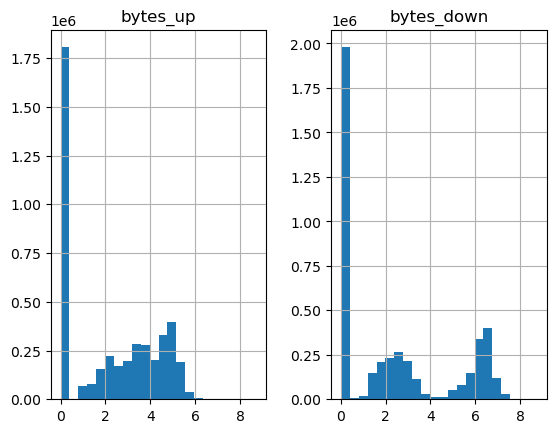

In [10]:
smart.hist(column = ['bytes_up','bytes_down'], bins = int(1 + 3.3*math.log(4417903, 10)))
plt.show()

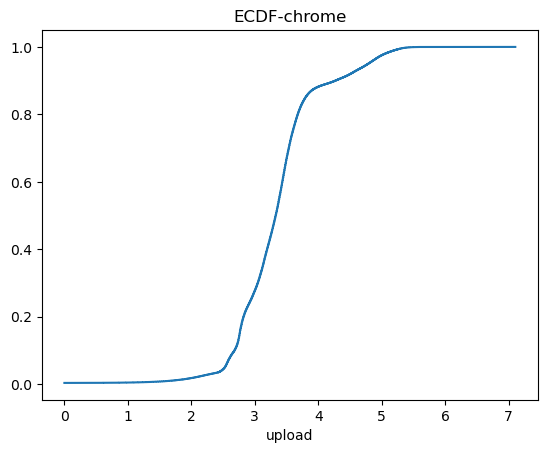

In [11]:
ecdf = sm.distributions.ECDF(chrome['bytes_up'])

x = np.linspace(min(chrome['bytes_up']), max(chrome['bytes_up']), num = 1000)
y = ecdf(x)
plt.step(x, y)
plt.title('ECDF-chrome')
plt.xlabel('upload')
plt.show()

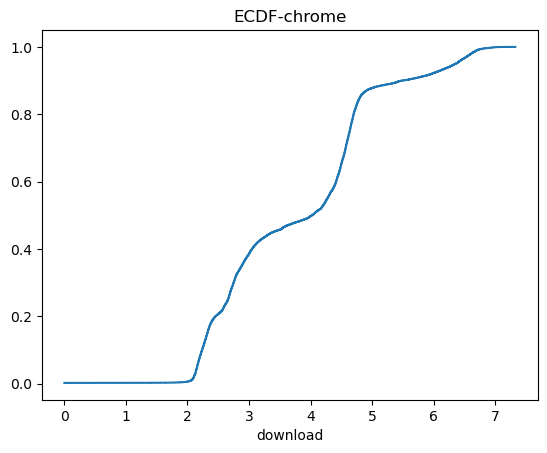

In [12]:
ecdf = sm.distributions.ECDF(chrome['bytes_down'])

x = np.linspace(min(chrome['bytes_down']), max(chrome['bytes_down']), num = 1000)
y = ecdf(x)
plt.step(x, y)
plt.title('ECDF-chrome')
plt.xlabel('download')
plt.show()

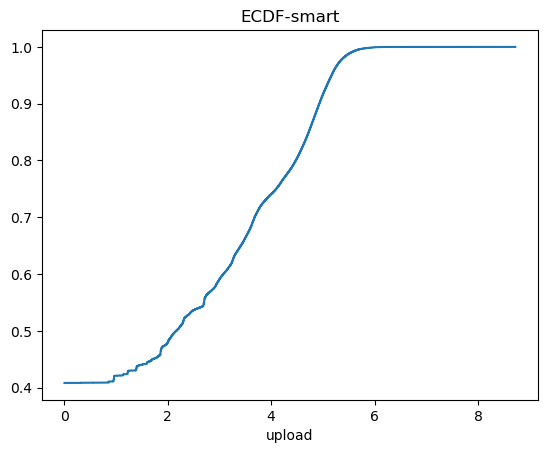

In [13]:
ecdf = sm.distributions.ECDF(smart['bytes_up'])

x = np.linspace(min(smart['bytes_up']), max(smart['bytes_up']), num = 1000)
y = ecdf(x)
plt.step(x, y)
plt.title('ECDF-smart')
plt.xlabel('upload')
plt.show()

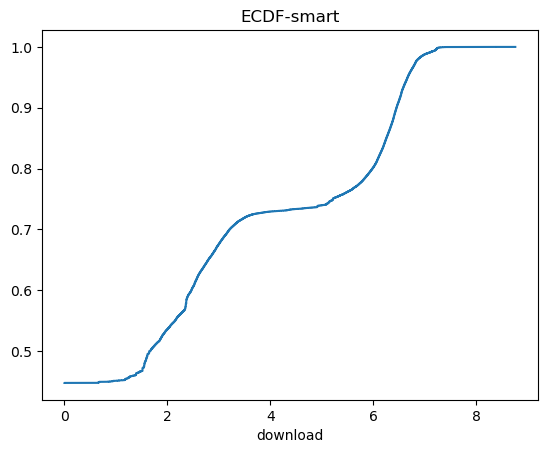

In [14]:
ecdf = sm.distributions.ECDF(smart['bytes_down'])

x = np.linspace(min(smart['bytes_down']), max(smart['bytes_down']), num = 1000)
y = ecdf(x)
plt.step(x, y)
plt.title('ECDF-smart')
plt.xlabel('download')
plt.show()

<h1>Seção 3: Estatísticas por horário</h1>

In [15]:
chrome['hora'] = chrome.date_hour.str[11:13]
chrome['hora'] = pd.to_numeric(chrome['hora'])
chrome

,device_id,date_hour,bytes_up,bytes_down,hora
0,66161985,2021-09-06 00:01:00,3.475383,4.691848,0
1,66161985,2021-09-06 00:02:00,2.836916,2.517536,0
2,66161985,2021-09-06 00:03:00,3.652720,4.578812,0
3,66161985,2021-09-06 00:04:00,2.890496,2.362105,0
4,66161985,2021-09-06 00:05:00,3.488877,4.713136,0
...,...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,3.306425,4.637820,16
1620525,90339988,2021-11-26 16:53:00,3.850585,3.202216,16
1620526,90339988,2021-11-26 16:54:00,2.689309,4.695771,16
1620527,90339988,2021-11-26 16:55:00,0.000000,2.136721,16


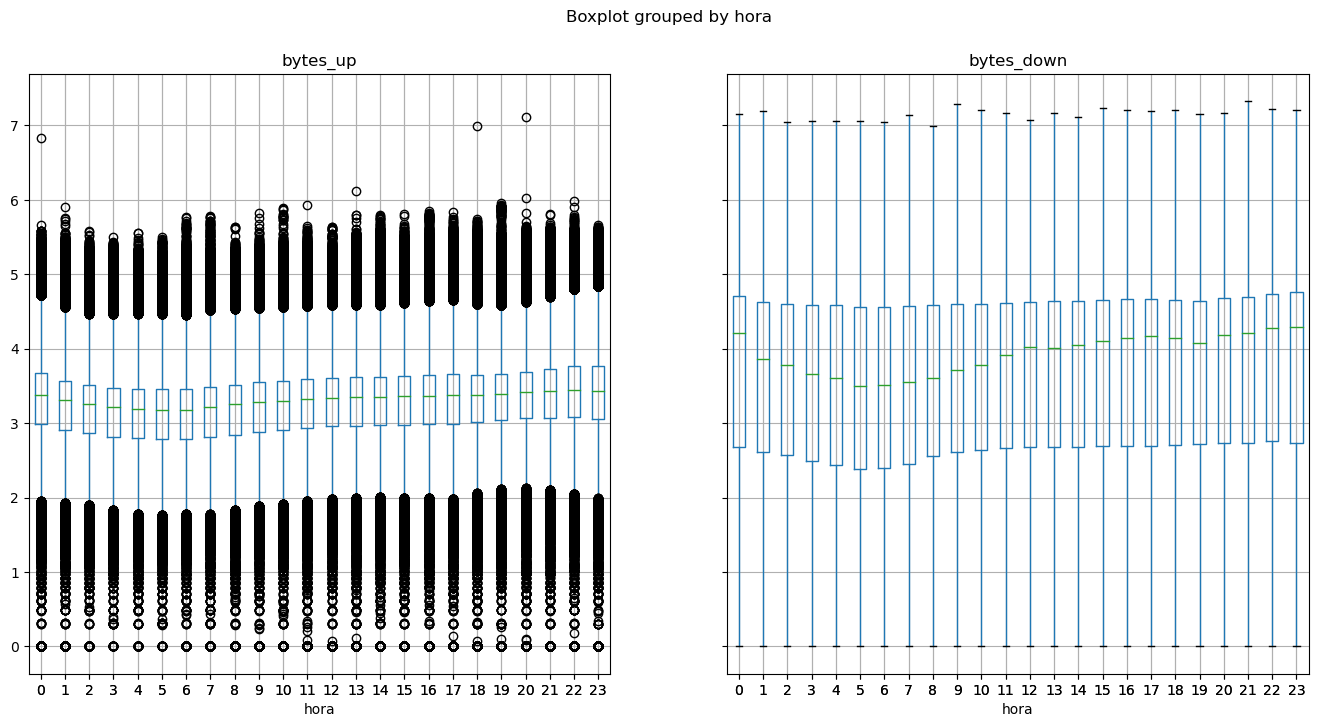

In [16]:
chrome.boxplot(column = ['bytes_up', 'bytes_down'], by = 'hora', figsize = (16, 8) )
plt.show()

In [17]:
smart['hora'] = smart.date_hour.str[11:13]
smart['hora'] = pd.to_numeric(smart['hora'])
smart

,device_id,date_hour,bytes_up,bytes_down,hora
0,77209603,2021-11-22 15:23:00,5.123636,6.449963,15
1,77209603,2021-11-22 15:24:00,5.063602,6.354955,15
2,77209603,2021-11-22 15:25:00,5.057023,6.363475,15
3,77209603,2021-11-22 15:26:00,4.987539,6.302449,15
4,77209603,2021-11-22 15:27:00,4.597372,5.906413,15
...,...,...,...,...,...
4417898,40241962,2021-11-25 23:19:00,0.954243,0.954243,23
4417899,40241962,2021-11-25 23:21:00,0.954243,0.954243,23
4417900,40241962,2021-11-25 23:23:00,0.954243,0.954243,23
4417901,40241962,2021-11-25 23:25:00,0.954243,0.954243,23


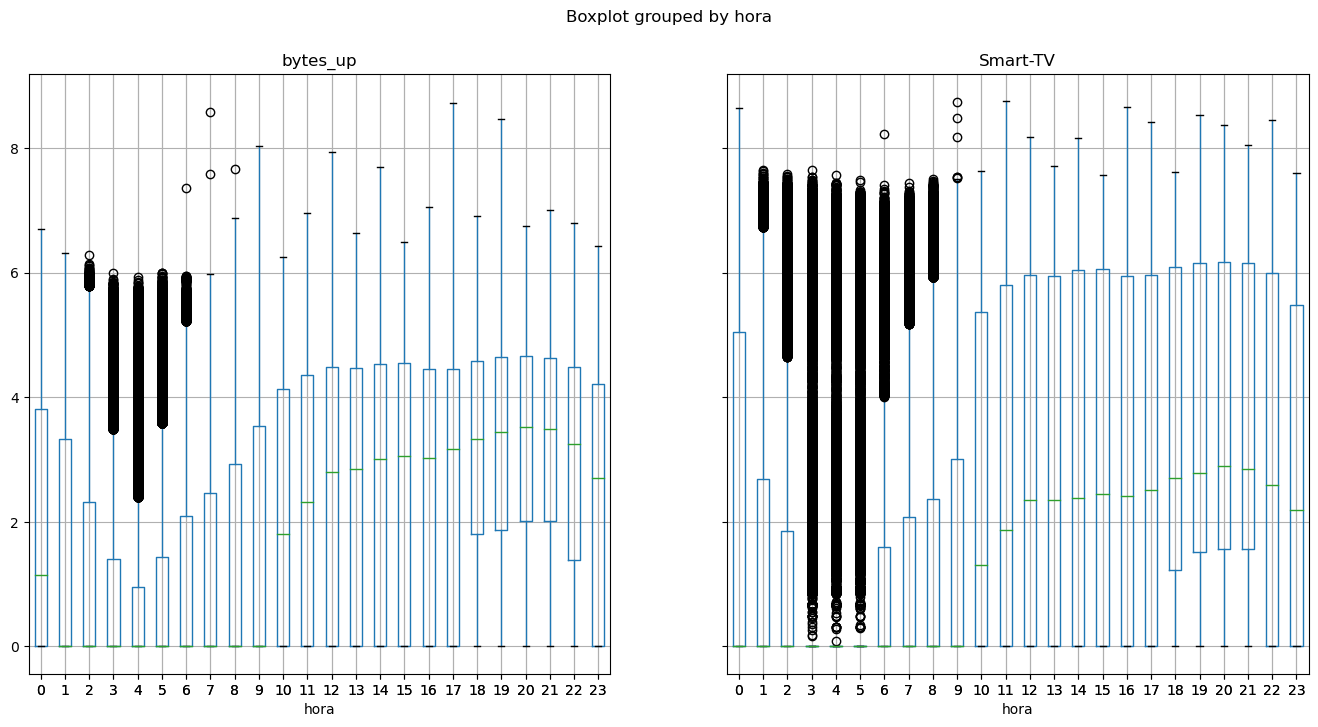

In [18]:
smart.boxplot(column = ['bytes_up', 'bytes_down'], by = 'hora', figsize = (16, 8) )
plt.title('Smart-TV')
plt.show()

In [19]:
horas = []
ucmedias = []
ucvariancias = []
ucdesvios = []
ucmedianas = []
for i in range(24):
    horas.append(i)
    chromei = chrome.loc[chrome['hora'] == i, ['bytes_up']]
    ucmedias.append(np.mean(a=chromei,axis=0).item())
    ucvariancias.append(np.var(a=chromei,axis=0).item())
    ucdesvios.append(np.std(a=chromei,axis=0).item())
    ucmedianas.append(np.median(a=chromei, axis=0).item())
    
ucmedias = np.around(ucmedias, decimals=3)
ucvariancias = np.around(ucvariancias, decimals=3)
ucdesvios = np.around(ucdesvios, decimals=3)
ucmedianas = np.around(ucmedianas, decimals=3)

print(f'Médias:\n{ucmedias}\n\nVariâncias:\n{ucvariancias}\n\nDesvios:\n{ucdesvios}\n\nMedianas:\n{ucmedianas}' )

Médias:
[3.432 3.322 3.243 3.202 3.178 3.159 3.157 3.201 3.242 3.286 3.298 3.321
 3.348 3.355 3.363 3.381 3.399 3.408 3.401 3.418 3.468 3.494 3.522 3.508]

Variâncias:
[0.631 0.482 0.341 0.307 0.315 0.291 0.304 0.337 0.39  0.397 0.407 0.408
 0.405 0.429 0.425 0.435 0.478 0.496 0.475 0.484 0.494 0.543 0.596 0.693]

Desvios:
[0.795 0.694 0.584 0.554 0.561 0.539 0.551 0.581 0.624 0.63  0.638 0.638
 0.636 0.655 0.652 0.66  0.692 0.704 0.689 0.696 0.703 0.737 0.772 0.833]

Medianas:
[3.379 3.317 3.257 3.211 3.184 3.172 3.173 3.212 3.251 3.28  3.301 3.328
 3.341 3.349 3.348 3.363 3.368 3.373 3.379 3.388 3.415 3.425 3.444 3.428]


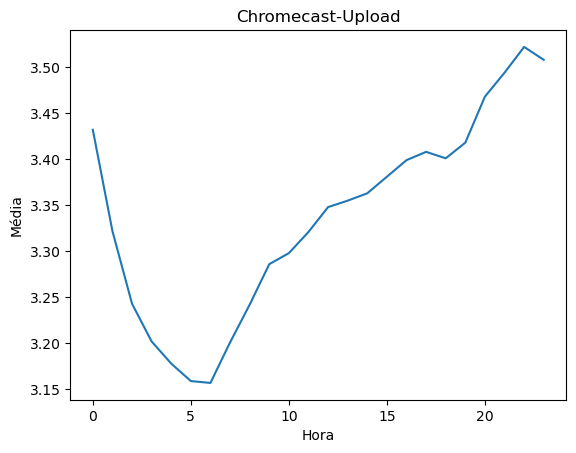

In [20]:
plt.plot(horas, ucmedias)
plt.title('Chromecast-Upload')
plt.xlabel('Hora')
plt.ylabel('Média')
plt.show()

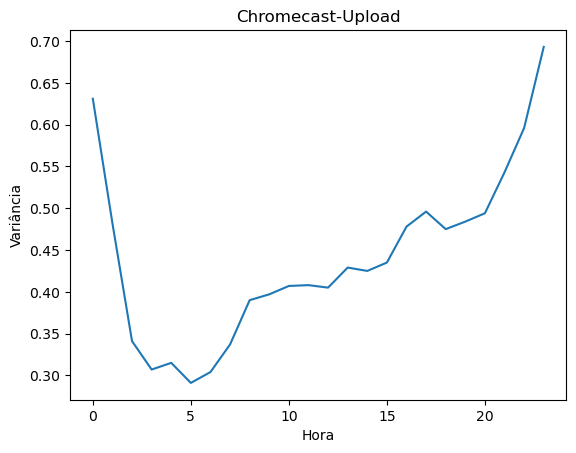

In [21]:
plt.plot(horas, ucvariancias)
plt.title('Chromecast-Upload')
plt.xlabel('Hora')
plt.ylabel('Variância')
plt.show()

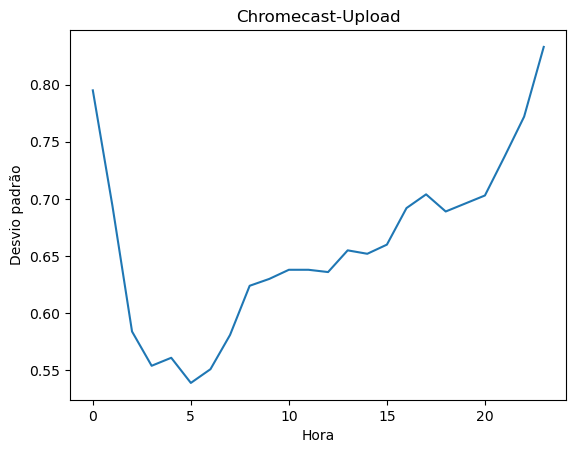

In [22]:
plt.plot(horas, ucdesvios)
plt.title('Chromecast-Upload')
plt.xlabel('Hora')
plt.ylabel('Desvio padrão')
plt.show()

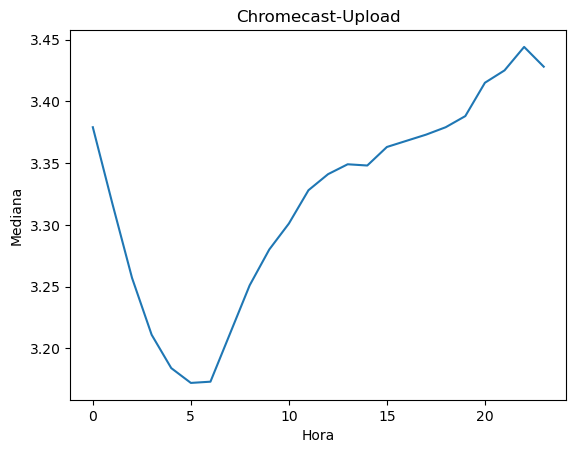

In [23]:
plt.plot(horas, ucmedianas)
plt.title('Chromecast-Upload')
plt.xlabel('Hora')
plt.ylabel('Mediana')
plt.show()

In [24]:
horas = []
usmedias = []
usvariancias = []
usdesvios = []
usmedianas = []
for i in range(24):
    horas.append(i)
    smarti = smart.loc[smart['hora'] == i, ['bytes_up']]
    usmedias.append(np.mean(a=smarti,axis=0).item())
    usvariancias.append(np.var(a=smarti,axis=0).item())
    usdesvios.append(np.std(a=smarti,axis=0).item())
    usmedianas.append(np.median(a=smarti, axis=0).item())
usmedias = np.around(usmedias, decimals=3)
usvariancias = np.around(usvariancias, decimals=3)
usdesvios = np.around(usdesvios, decimals=3)
usmedianas = np.around(usmedianas, decimals=3)
print(f'Médias:\n{usmedias}\n\nVariâncias:\n{usvariancias}\n\nDesvios:\n{usdesvios}\n\nMedianas:\n{usmedianas}' )

Médias:
[1.894 1.467 1.154 0.893 0.769 0.875 1.025 1.197 1.392 1.717 2.017 2.266
 2.474 2.489 2.557 2.606 2.62  2.744 2.951 3.053 3.124 3.103 2.837 2.375]

Variâncias:
[4.157 3.759 3.152 2.465 2.056 2.345 2.64  3.001 3.529 3.971 4.236 4.268
 4.158 4.138 4.218 4.116 3.867 3.591 3.35  3.276 3.169 3.132 3.459 3.939]

Desvios:
[2.039 1.939 1.775 1.57  1.434 1.531 1.625 1.732 1.878 1.993 2.058 2.066
 2.039 2.034 2.054 2.029 1.966 1.895 1.83  1.81  1.78  1.77  1.86  1.985]

Medianas:
[1.142 0.    0.    0.    0.    0.    0.    0.    0.    0.    1.813 2.318
 2.808 2.852 3.004 3.052 3.027 3.169 3.333 3.438 3.531 3.484 3.258 2.71 ]


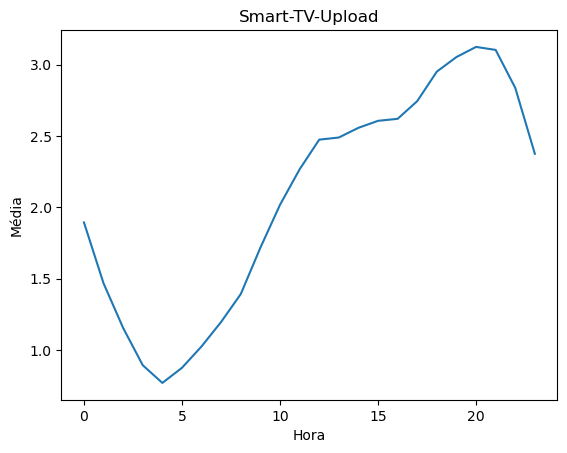

In [25]:
plt.plot(horas, usmedias)
plt.title('Smart-TV-Upload')
plt.xlabel('Hora')
plt.ylabel('Média')
plt.show()

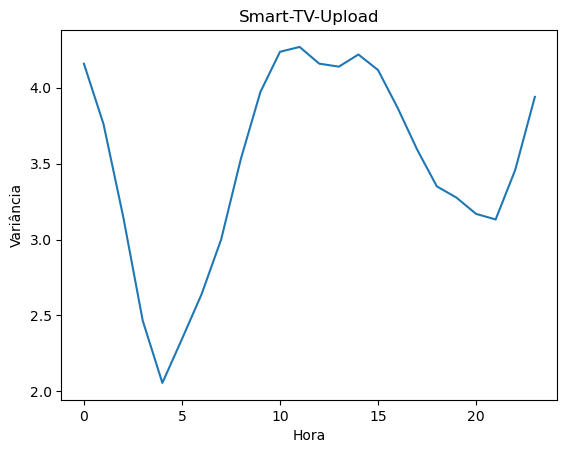

In [26]:
plt.plot(horas, usvariancias)
plt.title('Smart-TV-Upload')
plt.xlabel('Hora')
plt.ylabel('Variância')
plt.show()

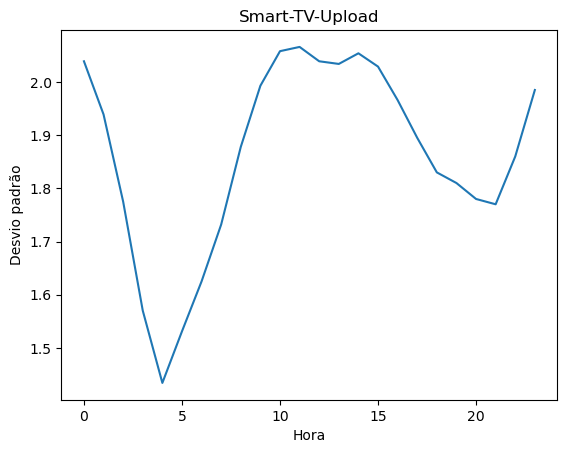

In [27]:
plt.plot(horas, usdesvios)
plt.title('Smart-TV-Upload')
plt.xlabel('Hora')
plt.ylabel('Desvio padrão')
plt.show()

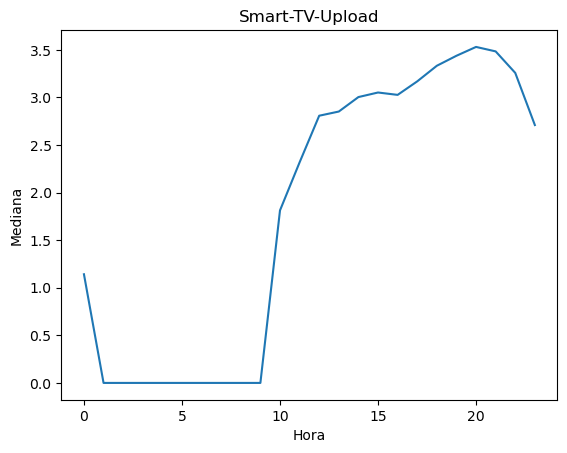

In [28]:
plt.plot(horas, usmedianas)
plt.title('Smart-TV-Upload')
plt.xlabel('Hora')
plt.ylabel('Mediana')
plt.show()

In [29]:
horas = []
dcmedias = []
dcvariancias = []
dcdesvios = []
dcmedianas = []
for i in range(24):
    horas.append(i)
    chromei = chrome.loc[chrome['hora'] == i, ['bytes_down']]
    dcmedias.append(np.mean(a=chromei,axis=0).item())
    dcvariancias.append(np.var(a=chromei,axis=0).item())
    dcdesvios.append(np.std(a=chromei,axis=0).item())
    dcmedianas.append(np.median(a=chromei, axis=0).item())
dcmedias = np.around(dcmedias, decimals=3)
dcvariancias = np.around(dcvariancias, decimals=3)
dcdesvios = np.around(dcdesvios, decimals=3)
dcmedianas = np.around(dcmedianas, decimals=3)
print(f'Médias:\n{dcmedias}\n\nVariâncias:\n{dcvariancias}\n\nDesvios:\n{dcdesvios}\n\nMedianas:\n{dcmedianas}' )

Médias:
[3.953 3.776 3.686 3.637 3.618 3.571 3.566 3.616 3.653 3.697 3.708 3.742
 3.779 3.785 3.798 3.833 3.866 3.88  3.858 3.853 3.922 3.968 4.036 4.053]

Variâncias:
[2.065 1.741 1.457 1.407 1.414 1.377 1.371 1.427 1.487 1.509 1.519 1.515
 1.538 1.589 1.582 1.624 1.709 1.73  1.661 1.66  1.751 1.861 1.969 2.159]

Desvios:
[1.437 1.32  1.207 1.186 1.189 1.173 1.171 1.194 1.219 1.229 1.232 1.231
 1.24  1.26  1.258 1.274 1.307 1.315 1.289 1.288 1.323 1.364 1.403 1.469]

Medianas:
[4.209 3.864 3.784 3.655 3.606 3.494 3.516 3.557 3.602 3.713 3.786 3.913
 4.02  4.007 4.052 4.108 4.146 4.169 4.143 4.08  4.178 4.215 4.273 4.286]


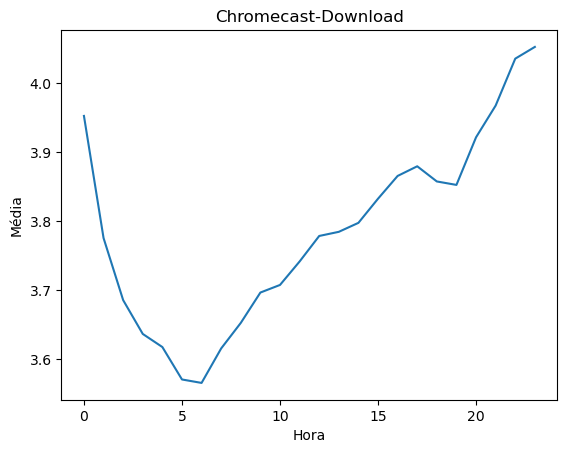

In [30]:
plt.plot(horas, dcmedias)
plt.title('Chromecast-Download')
plt.xlabel('Hora')
plt.ylabel('Média')
plt.show()

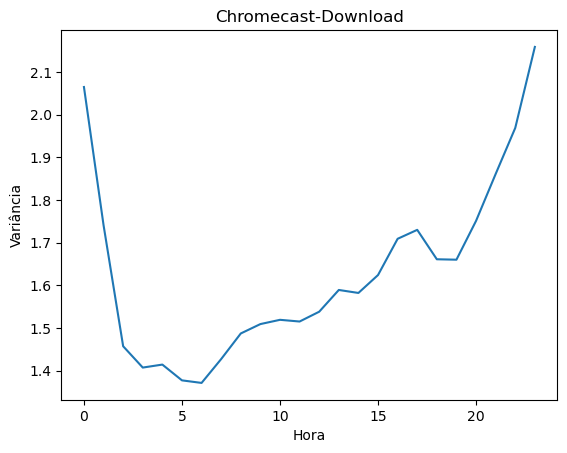

In [31]:
plt.plot(horas, dcvariancias)
plt.title('Chromecast-Download')
plt.xlabel('Hora')
plt.ylabel('Variância')
plt.show()

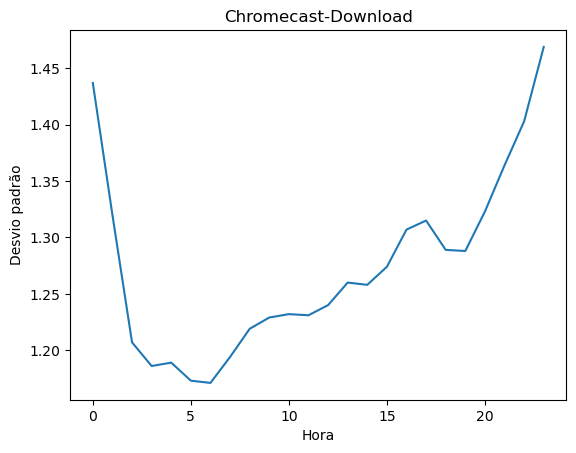

In [32]:
plt.plot(horas, dcdesvios)
plt.title('Chromecast-Download')
plt.xlabel('Hora')
plt.ylabel('Desvio padrão')
plt.show()

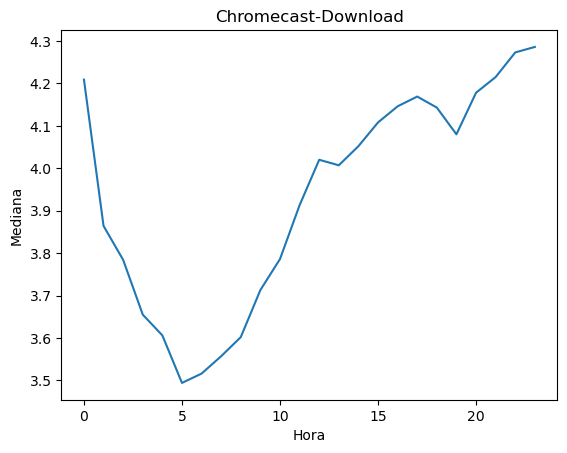

In [33]:
plt.plot(horas, dcmedianas)
plt.title('Chromecast-Download')
plt.xlabel('Hora')
plt.ylabel('Mediana')
plt.show()

In [34]:
horas = []
dsmedias = []
dsvariancias = []
dsdesvios = []
dsmedianas = []
for i in range(24):
    horas.append(i)
    smarti = smart.loc[smart['hora'] == i, ['bytes_down']]
    dsmedias.append(np.mean(a=smarti,axis=0).item())
    dsvariancias.append(np.var(a=smarti,axis=0).item())
    dsdesvios.append(np.std(a=smarti,axis=0).item())
    dsmedianas.append(np.median(a=smarti, axis=0).item())
dsmedias = np.around(dsmedias, decimals=3)
dsvariancias = np.around(dsvariancias, decimals=3)
dsdesvios = np.around(dsdesvios, decimals=3)
dsmedianas = np.around(dsmedianas, decimals=3)
print(f'Médias:\n{dsmedias}\n\nVariâncias:\n{dsvariancias}\n\nDesvios:\n{dsdesvios}\n\nMedianas:\n{dsmedianas}' )

Médias:
[2.105 1.602 1.228 0.897 0.736 0.891 1.073 1.245 1.478 1.868 2.23  2.526
 2.775 2.779 2.876 2.92  2.876 2.958 3.191 3.322 3.396 3.366 3.061 2.586]

Variâncias:
[6.888 6.052 4.957 3.628 2.887 3.522 4.    4.401 5.324 6.252 6.884 7.055
 7.044 7.002 7.238 7.163 6.759 6.416 6.242 6.293 6.201 6.125 6.289 6.648]

Desvios:
[2.624 2.46  2.226 1.905 1.699 1.877 2.    2.098 2.307 2.5   2.624 2.656
 2.654 2.646 2.69  2.676 2.6   2.533 2.498 2.509 2.49  2.475 2.508 2.578]

Medianas:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    1.308 1.876
 2.352 2.358 2.388 2.441 2.409 2.512 2.705 2.792 2.89  2.851 2.588 2.185]


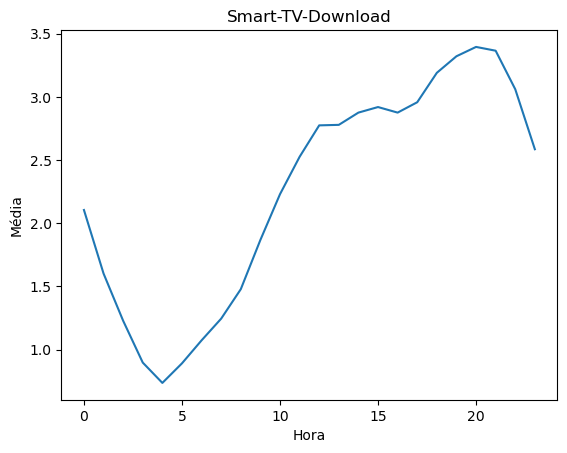

In [35]:
plt.plot(horas, dsmedias)
plt.title('Smart-TV-Download')
plt.xlabel('Hora')
plt.ylabel('Média')
plt.show()

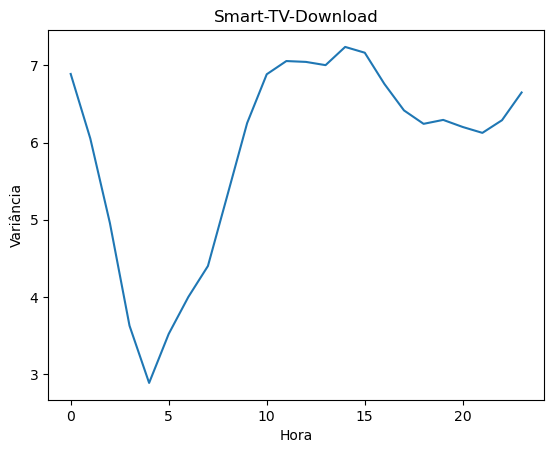

In [36]:
plt.plot(horas, dsvariancias)
plt.title('Smart-TV-Download')
plt.xlabel('Hora')
plt.ylabel('Variância')
plt.show()

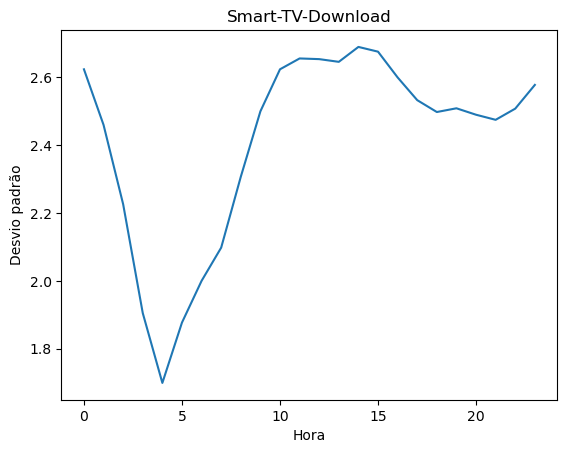

In [37]:
plt.plot(horas, dsdesvios)
plt.title('Smart-TV-Download')
plt.xlabel('Hora')
plt.ylabel('Desvio padrão')
plt.show()

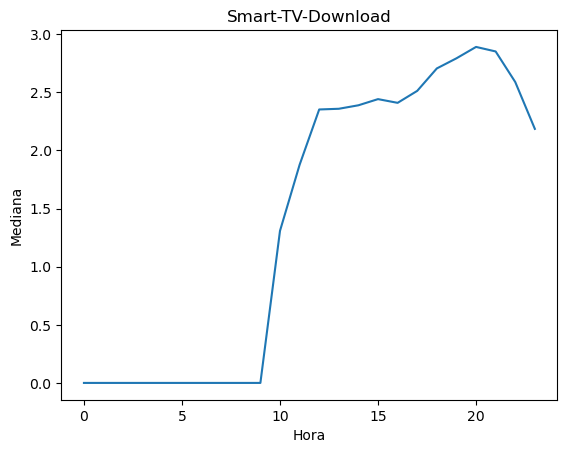

In [38]:
plt.plot(horas, dsmedianas)
plt.title('Smart-TV-Download')
plt.xlabel('Hora')
plt.ylabel('Mediana')
plt.show()

<h1>Seção 4: Caracterizando os horários com maior valor de tráfego</h1>

In [39]:
usmedianas = np.array(usmedianas)
usmedias = np.array(usmedias)
dsmedianas = np.array(dsmedianas)
dsmedias = np.array(dsmedias)

hora1 = np.argmax(usmedianas)
hora2 = np.argmax(usmedias)
hora3 = np.argmax(dsmedianas)
hora4 = np.argmax(dsmedias)

print(f'Hora1: {hora1}  Hora2: {hora2}  Hora3: {hora3}  Hora4: {hora4}')

Hora1: 20  Hora2: 20  Hora3: 20  Hora4: 20


In [40]:
dataset1 = smart.loc[smart['hora'] == 20]

print(f'Dataset 1/2/3/4:\n\n{dataset1}')

Dataset 1/2/3/4:

         device_id            date_hour  bytes_up  bytes_down  hora
268       77209603  2021-11-22 20:00:00  4.566231    5.915830    20
269       77209603  2021-11-22 20:01:00  4.897418    6.145693    20
270       77209603  2021-11-22 20:02:00  4.786100    5.925210    20
271       77209603  2021-11-22 20:03:00  4.579742    5.836741    20
272       77209603  2021-11-22 20:04:00  4.577396    5.846038    20
...            ...                  ...       ...         ...   ...
4417305   40241962  2021-11-24 20:57:00  5.229510    6.623223    20
4417306   40241962  2021-11-24 20:58:00  5.350684    6.766381    20
4417307   40241962  2021-11-24 20:59:00  5.317948    6.722319    20
4417766   40241962  2021-11-25 20:24:00  3.828982    4.000391    20
4417767   40241962  2021-11-25 20:25:00  0.000000    0.000000    20

[212608 rows x 5 columns]


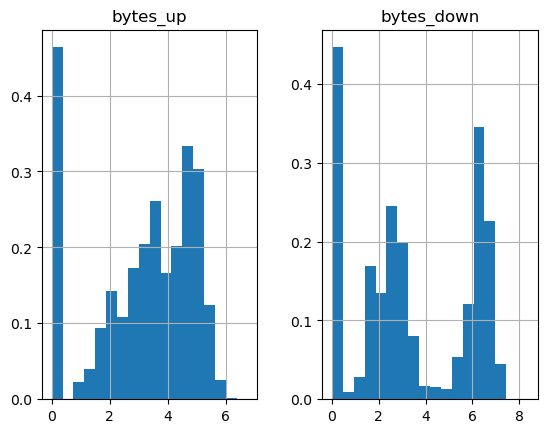

In [41]:
dataset1.hist(column = ['bytes_up','bytes_down'], bins = int(1 + 3.3*math.log(212608, 10)), density = True)
plt.show()

In [42]:
media1up = dataset1['bytes_up'].mean()
mediana1up = dataset1['bytes_up'].median()
media1down = dataset1['bytes_down'].mean()
mediana1down = dataset1['bytes_down'].median()
desvio1up = dataset1['bytes_up'].std()
desvio1down = dataset1['bytes_down'].std()

media1up = np.format_float_positional(media1up, precision=3)
mediana1up = np.format_float_positional(mediana1up, precision=3)
media1down = np.format_float_positional(media1down, precision=3)
mediana1down = np.format_float_positional(mediana1down, precision=3)
desvio1up = np.format_float_positional(desvio1up, precision=3)
desvio1down = np.format_float_positional(desvio1down, precision=3)


print(f'Hora 20:\n\nUpload - Média: {media1up}   Mediana: {mediana1up}\n\nDownload - Média: {media1down}   Mediana: {mediana1down}')

Hora 20:

Upload - Média: 3.124   Mediana: 3.531

Download - Média: 3.396   Mediana: 2.89


In [43]:
alfa1up, posicao1up, beta1up = gamma.fit(dataset1['bytes_up'])
alfa1down, posicao1down, beta1down = gamma.fit(dataset1['bytes_down'])

alfa1up = np.format_float_positional(alfa1up, precision=3)
posicao1up = np.format_float_positional(posicao1up, precision=3)
beta1up = np.format_float_positional(beta1up, precision=3)
alfa1down = np.format_float_positional(alfa1down, precision=3)
posicao1down = np.format_float_positional(posicao1down, precision=3)
beta1down = np.format_float_positional(beta1down, precision=3)

print(f'Hora 20:\n\nUpload - Alfa: {alfa1up}   Posição: {posicao1up}   Beta: {beta1up}\n\nDownload - Alfa: {alfa1down}   Posição: {posicao1down}   Beta: {beta1down}')

Hora 20:

Upload - Alfa: 217.147   Posição: -23.86   Beta: 0.124

Download - Alfa: 896.547   Posição: -71.062   Beta: 0.083


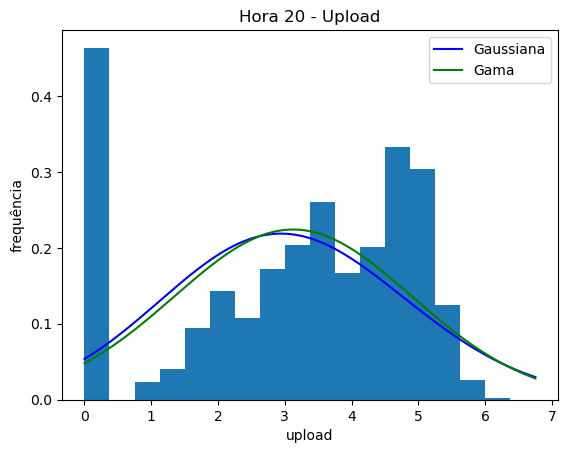

In [44]:
eixox = np.linspace(dataset1['bytes_up'].min(), dataset1['bytes_up'].max(), len(dataset1['bytes_up']))

gama = gamma.pdf(eixox, float(alfa1up), float(posicao1up), float(beta1up))

gaussiana = norm.pdf(eixox, float(media1up), float(desvio1up))

plt.title('Hora 20 - Upload')
plt.plot(eixox, gama, label = 'Gama', color = 'b')
plt.plot(eixox, gaussiana, label = 'Gaussiana', color = 'g')
plt.xlabel('upload')
plt.ylabel('frequência')
plt.legend(['Gaussiana', 'Gama'])
histograma = plt.hist(dataset1['bytes_up'], bins = int(1 + 3.3*math.log(212608, 10)), density=True)

plt.show()

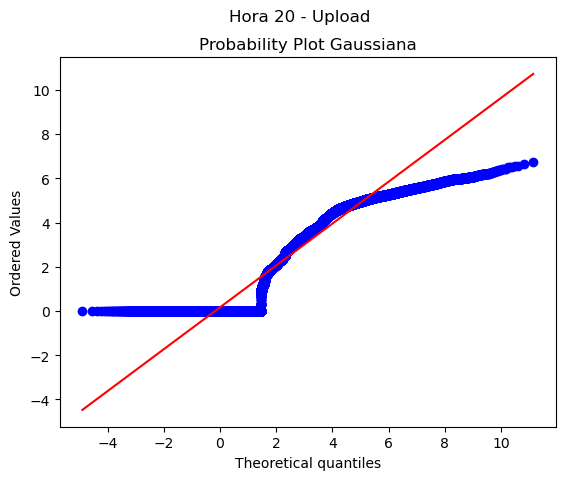

In [45]:
eixox = dataset1['bytes_up']

probplot(eixox, dist=norm, sparams=(float(media1up), float(desvio1up)), plot = plt)

plt.suptitle('Hora 20 - Upload')
plt.title('Probability Plot Gaussiana')
plt.show()

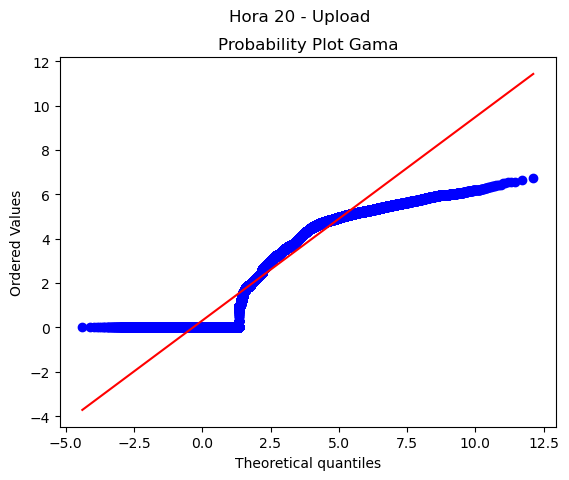

In [46]:
eixox = dataset1['bytes_up']

probplot(eixox, dist=gamma, sparams=(float(alfa1up), float(posicao1up), float(beta1up)), plot = plt)

plt.suptitle('Hora 20 - Upload')
plt.title('Probability Plot Gama')
plt.show()

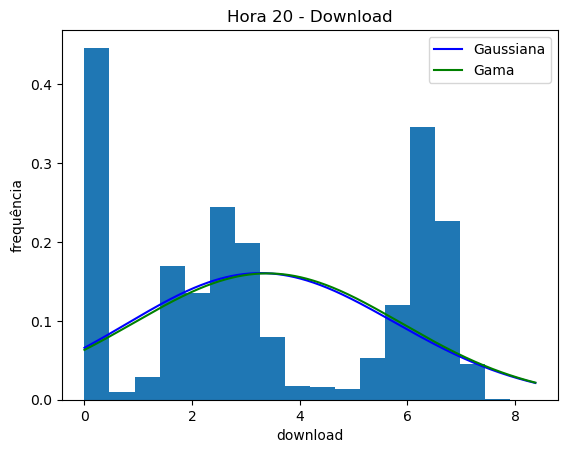

In [47]:
eixox = np.linspace(dataset1['bytes_down'].min(), dataset1['bytes_down'].max(), len(dataset1['bytes_down']))

gama = gamma.pdf(eixox, float(alfa1down), float(posicao1down), float(beta1down))

gaussiana = norm.pdf(eixox, float(media1down), float(desvio1down))

plt.title('Hora 20 - Download')
plt.plot(eixox, gama, label = 'Gama', color = 'b')
plt.plot(eixox, gaussiana, label = 'Gaussiana', color = 'g')
plt.xlabel('download')
plt.ylabel('frequência')
plt.legend(['Gaussiana', 'Gama'])
histograma = plt.hist(dataset1['bytes_down'], bins = int(1 + 3.3*math.log(212608, 10)), density=True)

plt.show()

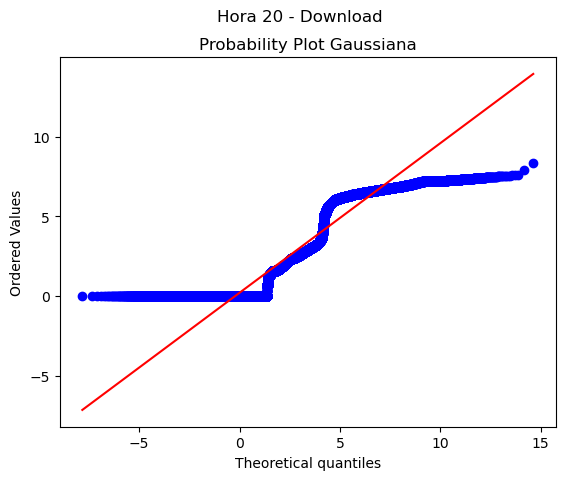

In [48]:
eixox = dataset1['bytes_down']

probplot(eixox, dist=norm, sparams=(float(media1down), float(desvio1down)), plot = plt)

plt.suptitle('Hora 20 - Download')
plt.title('Probability Plot Gaussiana')
plt.show()

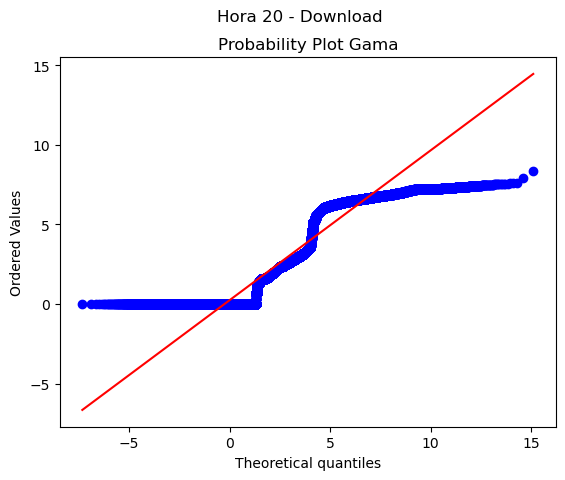

In [49]:
eixox = dataset1['bytes_down']

probplot(eixox, dist=gamma, sparams=(float(alfa1down), float(posicao1down), float(beta1down)), plot = plt)

plt.suptitle('Hora 20 - Download')
plt.title('Probability Plot Gama')
plt.show()

In [50]:
ucmedianas = np.array(ucmedianas)
ucmedias = np.array(ucmedias)
dcmedianas = np.array(dcmedianas)
dcmedias = np.array(dcmedias)

hora5 = np.argmax(ucmedianas)
hora6 = np.argmax(ucmedias)
hora7 = np.argmax(dcmedianas)
hora8 = np.argmax(dcmedias)

print(f'Hora5: {hora5}  Hora6: {hora6}  Hora7: {hora7}  Hora8: {hora8}')

Hora5: 22  Hora6: 22  Hora7: 23  Hora8: 23


In [51]:
dataset5 = chrome.loc[chrome['hora'] == 22]
dataset7 = chrome.loc[chrome['hora'] == 23]

print(f'Dataset 5/6:\n\n{dataset5}\n\nDataset 7/8:\n\n{dataset7}')

Dataset 5/6:

         device_id            date_hour  bytes_up  bytes_down  hora
1254      66161985  2021-09-06 22:00:00  3.409409    4.758861    22
1255      66161985  2021-09-06 22:01:00  3.035275    2.441061    22
1256      66161985  2021-09-06 22:02:00  3.735923    4.800899    22
1257      66161985  2021-09-06 22:03:00  3.519883    2.790285    22
1258      66161985  2021-09-06 22:04:00  3.444846    4.488574    22
...            ...                  ...       ...         ...   ...
1620036   90339988  2021-11-25 22:55:00  5.395335    6.768339    22
1620037   90339988  2021-11-25 22:56:00  5.414119    6.744692    22
1620038   90339988  2021-11-25 22:57:00  5.408052    6.778720    22
1620039   90339988  2021-11-25 22:58:00  5.392966    6.745790    22
1620040   90339988  2021-11-25 22:59:00  5.201116    6.602988    22

[76738 rows x 5 columns]

Dataset 7/8:

         device_id            date_hour  bytes_up  bytes_down  hora
1312      66161985  2021-09-06 23:00:00  2.973620    2.538314

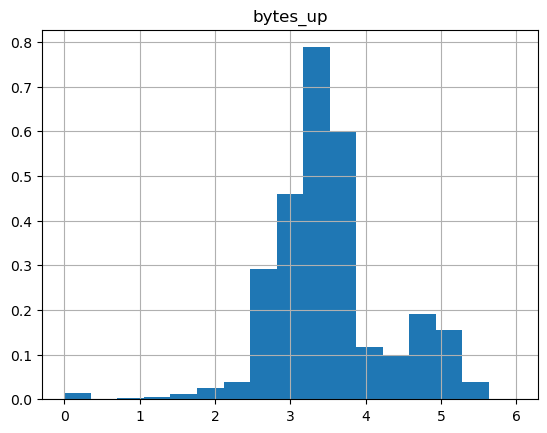

In [52]:
dataset5.hist(column = ['bytes_up'], bins = int(1 + 3.3*math.log(76738, 10)), density = True)
plt.show()

In [53]:
media5up = dataset5['bytes_up'].mean()
mediana5up = dataset5['bytes_up'].median()
desvio5up = dataset5['bytes_up'].std()


media5up = np.format_float_positional(media5up, precision=3)
mediana5up = np.format_float_positional(mediana5up, precision=3)
desvio5up = np.format_float_positional(desvio5up, precision=3)

print(f'Hora 22:\n\nUpload - Média: {media5up}   Mediana: {mediana5up}')

Hora 22:

Upload - Média: 3.522   Mediana: 3.444


In [54]:
alfa5up, posicao5up, beta5up = gamma.fit(dataset5['bytes_up'])

alfa5up = np.format_float_positional(alfa5up, precision=3)
posicao5up = np.format_float_positional(posicao5up, precision=3)
beta5up = np.format_float_positional(beta5up, precision=3)

print(f'Hora 22:\n\nUpload - Alfa: {alfa5up}   Posição: {posicao5up}   Beta: {beta5up}')

Hora 22:

Upload - Alfa: 3148.882   Posição: -39.809   Beta: 0.014


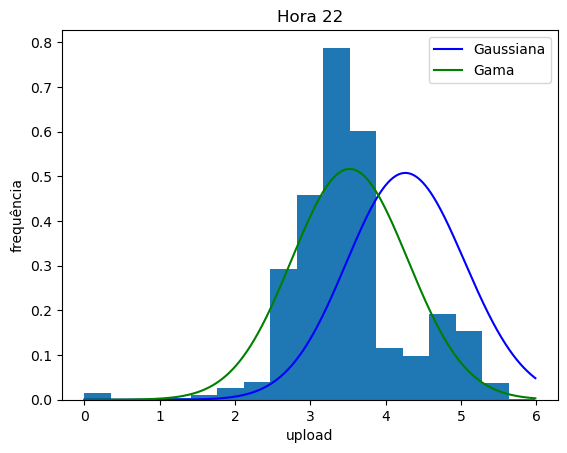

In [55]:
eixox = np.linspace(dataset5['bytes_up'].min(), dataset5['bytes_up'].max(), len(dataset5['bytes_up']))

gama = gamma.pdf(eixox, float(alfa5up), float(posicao5up), float(beta5up))

gaussiana = norm.pdf(eixox, float(media5up), float(desvio5up))

plt.title('Hora 22')
plt.plot(eixox, gama, label = 'Gama', color = 'b')
plt.plot(eixox, gaussiana, label = 'Gaussiana', color = 'g')
plt.legend(['Gaussiana', 'Gama'])
plt.xlabel('upload')
plt.ylabel('frequência')
histograma5 = plt.hist(dataset5['bytes_up'], bins = int(1 + 3.3*math.log(76738, 10)), density=True)

plt.show()

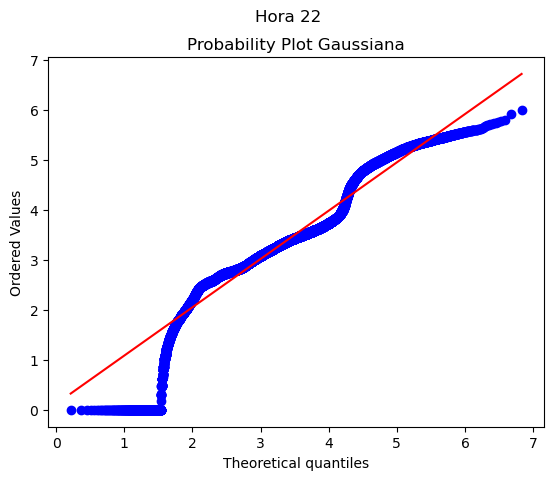

In [56]:
eixox = dataset5['bytes_up']

probplot(eixox, dist=norm, sparams=(float(media5up), float(desvio5up)), plot = plt)

plt.suptitle('Hora 22')
plt.title('Probability Plot Gaussiana')
plt.show()

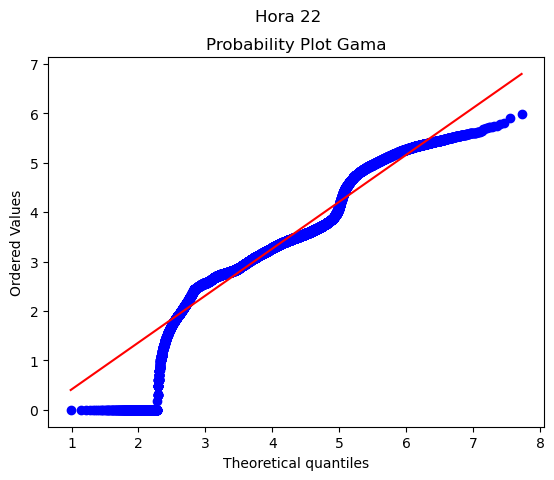

In [57]:
eixox = dataset5['bytes_up']

probplot(eixox, dist=gamma, sparams=(float(alfa5up), float(posicao5up), float(beta5up)), plot = plt)

plt.suptitle('Hora 22')
plt.title('Probability Plot Gama')
plt.show()


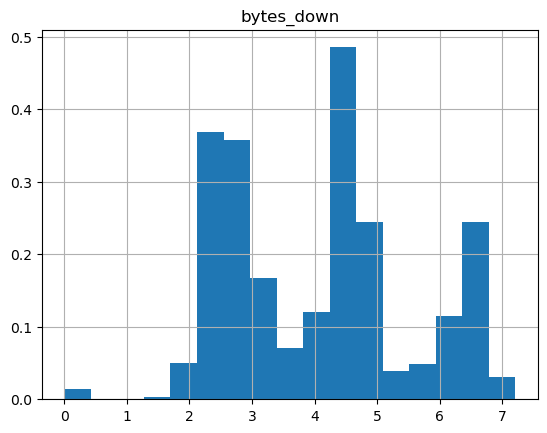

In [58]:
dataset7.hist(column = ['bytes_down'], bins = int(1 + 3.3*math.log(71848, 10)), density = True)
plt.show()

In [59]:
media7down = dataset7['bytes_down'].mean()
mediana7down = dataset7['bytes_down'].median()
desvio7down = dataset7['bytes_down'].std()


media7down = np.format_float_positional(media7down, precision=3)
mediana7down = np.format_float_positional(mediana7down, precision=3)
desvio7down = np.format_float_positional(desvio7down, precision=3)

print(f'Hora 23:\n\nDownload - Média: {media7down}   Mediana: {mediana7down}')

Hora 23:

Download - Média: 4.053   Mediana: 4.286


In [60]:
alfa7down, posicao7down, beta7down = gamma.fit(dataset7['bytes_up'])

alfa7down = np.format_float_positional(alfa7down, precision=3)
posicao7down = np.format_float_positional(posicao7down, precision=3)
beta7down = np.format_float_positional(beta7down, precision=3)

print(f'Hora 23:\n\nUpload - Alfa: {alfa7down}   Posição: {posicao7down}   Beta: {beta7down}')

Hora 23:

Upload - Alfa: 457.822   Posição: -14.576   Beta: 0.04


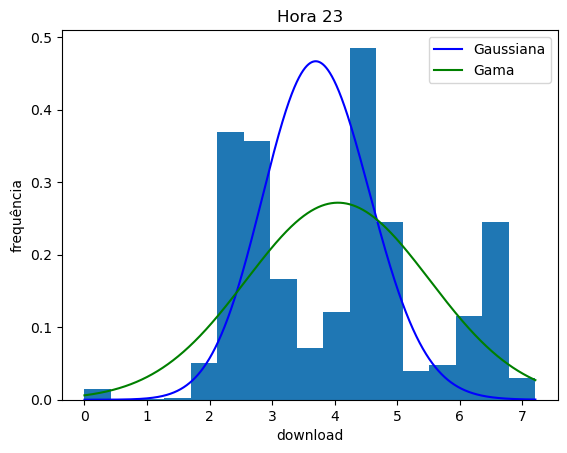

In [61]:
eixox = np.linspace(dataset7['bytes_down'].min(), dataset7['bytes_down'].max(), len(dataset7['bytes_down']))

gama = gamma.pdf(eixox, float(alfa7down), float(posicao7down), float(beta7down))

gaussiana = norm.pdf(eixox, float(media7down), float(desvio7down))

plt.title('Hora 23')
plt.plot(eixox, gama, label = 'Gama', color = 'b')
plt.plot(eixox, gaussiana, label = 'Gaussiana', color = 'g')
plt.xlabel('download')
plt.ylabel('frequência')
plt.legend(['Gaussiana', 'Gama'])
histograma7 = plt.hist(dataset7['bytes_down'], bins = int(1 + 3.3*math.log(71848, 10)), density=True)

plt.show()

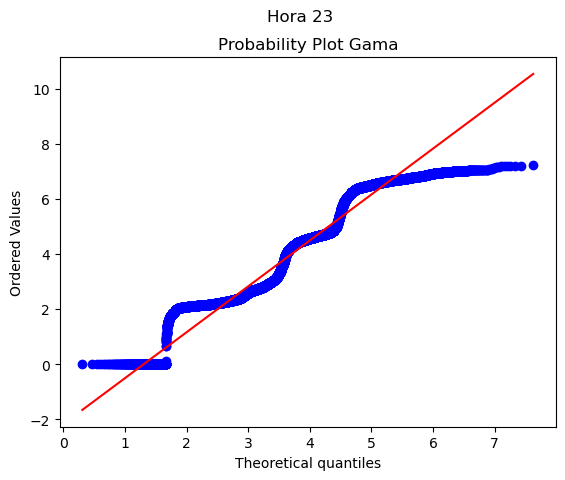

In [62]:
eixox = dataset7['bytes_down']

probplot(eixox, dist=gamma, sparams=(float(alfa7down), float(posicao7down), float(beta7down)), plot = plt)

plt.suptitle('Hora 23')
plt.title('Probability Plot Gama')
plt.show()


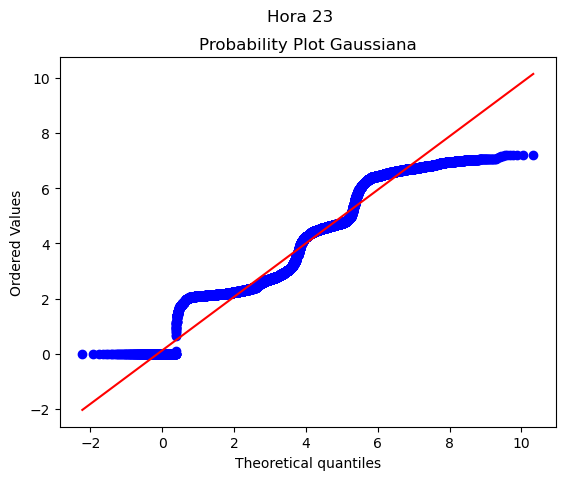

In [63]:
eixox = dataset7['bytes_down']

probplot(eixox, dist=norm, sparams=(float(media7down), float(desvio7down)), plot = plt)

plt.suptitle('Hora 23')
plt.title('Probability Plot Gaussiana')
plt.show()


<h1>Seção 5: Análise da correlação entre as taxas de upload e ownload para os horários com o maior valor de tráfego<h1>

Correlação entre entre dataset1/2(Hora 20 - Upload) e dataset3/4(Hora 20 - Download): 0.916


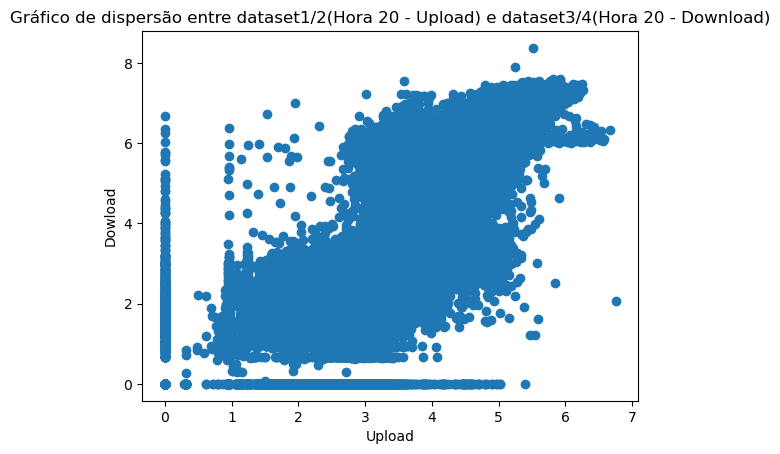

In [64]:
pr13 = pearsonr(dataset1['bytes_up'], dataset1['bytes_down'])
correlacao = pr13[0]
correlacao = np.format_float_positional(correlacao, precision=3)
print(f'Correlação entre entre dataset1/2(Hora 20 - Upload) e dataset3/4(Hora 20 - Download): {correlacao}')
plt.scatter(dataset1['bytes_up'], dataset1['bytes_down'])


plt.xlabel('Upload')
plt.ylabel('Dowload')
plt.title('Gráfico de dispersão entre dataset1/2(Hora 20 - Upload) e dataset3/4(Hora 20 - Download)')          
plt.show()

Correlação entre entre dataset7/8(Hora 23 - Upload) e dataset7/8(Hora 23 - Download): 0.793


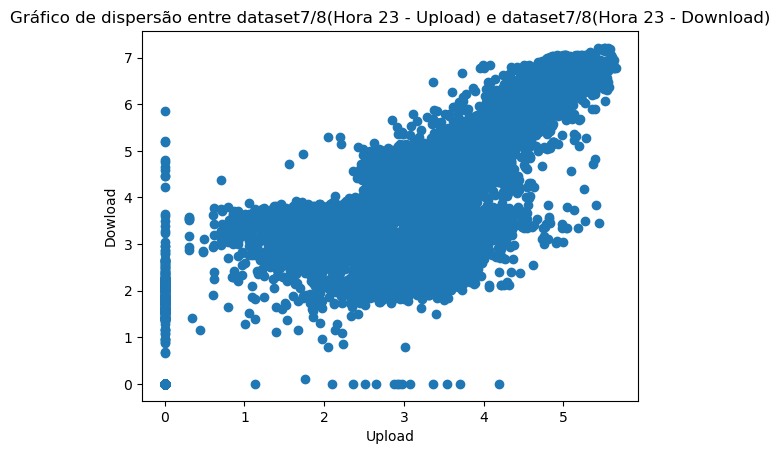

In [65]:
pr57 = pearsonr(dataset7['bytes_up'], dataset7['bytes_down'])
correlacao = pr57[0]
correlacao = np.format_float_positional(correlacao, precision=3)
print(f'Correlação entre entre dataset7/8(Hora 23 - Upload) e dataset7/8(Hora 23 - Download): {correlacao}')
plt.scatter(dataset7['bytes_up'], dataset7['bytes_down'])


plt.xlabel('Upload')
plt.ylabel('Dowload')
plt.title('Gráfico de dispersão entre dataset7/8(Hora 23 - Upload) e dataset7/8(Hora 23 - Download)')          
plt.show()

<h1>Seção 6: Comparação dos dados gerados pelos dispositivos Smart-TV e Chromecast</h1>

In [66]:
bins1 = pd.cut(dataset1['bytes_up'], bins = int(1 + 3.3*math.log(76738, 10)), include_lowest = True)
bins5 = pd.cut(dataset5['bytes_up'], bins = int(1 + 3.3*math.log(76738, 10)), include_lowest = True)

obs1 = bins1.value_counts().sort_index()/bins1.value_counts().sort_index().sum()
obs5 = bins5.value_counts().sort_index()/bins5.value_counts().sort_index().sum()

gtest = chi2_contingency([obs1, obs5], lambda_="log-likelihood")

s = np.format_float_positional(gtest[0], precision=3)
p = np.format_float_positional(gtest[1], precision=10)
print(f'G-test entre dataset1/2 e 5/6: \n\nG-test: {s}, P-valor: {p}')

G-test entre dataset1/2 e 5/6: 

G-test: 0.659, P-valor: 0.9999999974


In [67]:
bins3 = pd.cut(dataset1['bytes_down'], bins = int(1 + 3.3*math.log(71848, 10)), include_lowest = True)
bins7 = pd.cut(dataset7['bytes_down'], bins = int(1 + 3.3*math.log(71848, 10)), include_lowest = True)

obs3 = bins3.value_counts().sort_index()/bins3.value_counts().sort_index().sum()
obs7 = bins7.value_counts().sort_index()/bins7.value_counts().sort_index().sum()

gtest = chi2_contingency([obs3, obs7], lambda_="log-likelihood")

s = np.format_float_positional(gtest[0], precision=3)
p = np.format_float_positional(gtest[1], precision=8)
print(f'G-test entre dataset3/4 e 7/8: \n\nG-test: {s}, P-valor: {p}')

G-test entre dataset3/4 e 7/8: 

G-test: 1.126, P-valor: 0.99999985
